In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
dataset ="/Users/nishanrana/Downloads/Mall_Customers.csv"

In [4]:
df = pd.read_csv(dataset)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
X = df[['Annual Income (k$)','Spending Score (1-100)']]

In [8]:
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


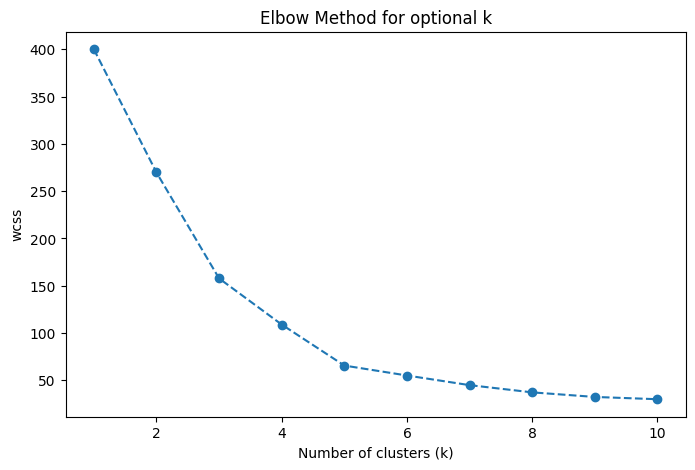

In [10]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

wcss =[]
K_value = range(1,11)
for k in K_value:
    kmeans = KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    
plt.figure(figsize=(8,5))
plt.plot(K_value,wcss,marker='o',linestyle='--')
plt.xlabel("Number of clusters (k)")
plt.ylabel("wcss")
plt.title("Elbow Method for optional k")
plt.show()

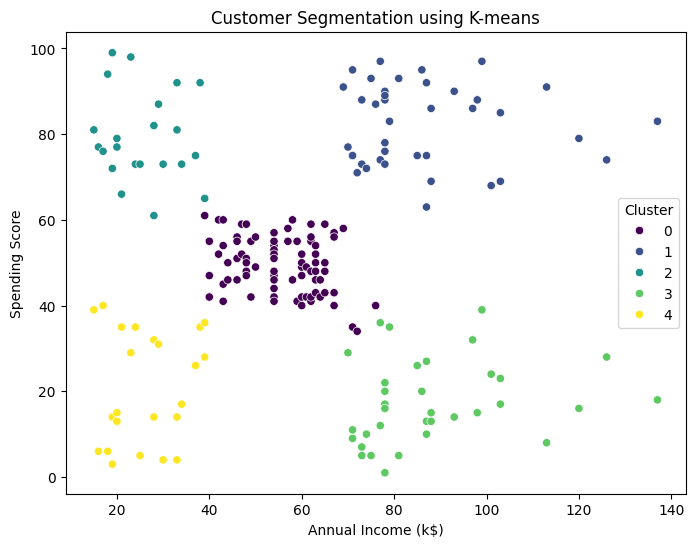

In [12]:
kmeans = KMeans(n_clusters= 5,random_state=42,n_init=10)
df['Cluster']=kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['Cluster'],palette='viridis')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-means")
plt.show()

In [13]:
new_sample = np.array([[50,60]])

new_sample_scaled = Scaler.transform(new_sample)

predicted_cluster=kmeans.predict(new_sample_scaled)

print(f"The new customer belong to cluster: {predicted_cluster[0]}")



The new customer belong to cluster: 0


/opt/anaconda3/envs/numpy_learn/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import davies_bouldin_score

In [16]:
dbi_score = davies_bouldin_score(X_scaled,df['Cluster'])
print(f"Davies-Boulding Index:{dbi_score:.2f}")

Davies-Boulding Index:0.57


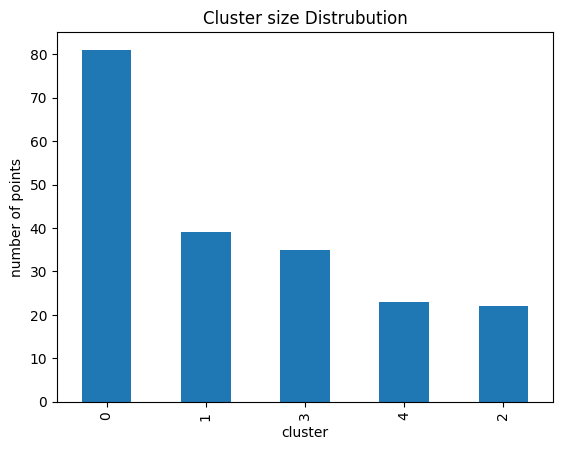

In [17]:
df['Cluster'].value_counts().plot(kind='bar',title="Cluster size Distrubution")
plt.xlabel("cluster")
plt.ylabel("number of points")
plt.show()


In [18]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled,df['Cluster'])
print(f"silhoutte score: {silhouette_avg:.2f}")

silhoutte score: 0.55
